# Supervised classification with linear models

## Linear regression

Recall that linear regression is used to predict a continuous *scalar* output $y$:

$$\hat{y}_n = wx_n + b$$

* But what if our data is not continuous, but instead was discrete?



For example, imagine if we wanted to predict if online banking transactions are fraudulent or not. We can imagine our output is a *binary* variable, where **TRUE** means the transaction is fraudulent and **FALSE** means it is not fraudulent. 

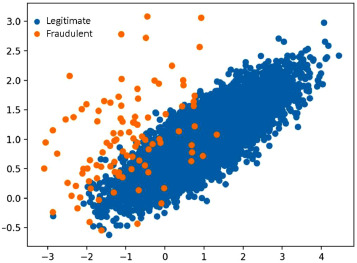

Our linear regression model will not work properly for this target variable, as our can take any value between negative infinity to infinity!

What would a prediction of 0.4 mean? Or -0.9? Or 1000? All of these predictions are possible outputs of our model for arbitrary feature combinations, yet they have no clear meaning. 

## Overview

* From linear regression to logistic regression
* Model form, use case
* How does logistic regression learn from data?
    * Function of model parameters 
* Interpreting logistic regression models
    * Probabilities
* Performing univariate logistic regression in `sklearn`

In this learning unit, we'll cover the fundamentals of logistic regression.

We'll cover the basic technical details of the model and what it is used for. You'll see what it takes to fit (or train, or learn, depending on your preferred term for it!) a logistic regression model and how such models are evaluated and interpreted.

Then we'll go through some practical examples using sklearn.

## From linear regression to logistic regression

A simple solution is to *transform* our linear regression output, to turn it into a value bound between 0 and 1.

For a simple univariate case, our model looks like this:

$$ p_n = \sigma\left(wx_n + b\right), $$

where:

* $\sigma$ is a transformation function, that takes any real valued input and produces output between 0 and 1,
* $p$ is the predicted probability of observation $n$ being true, and
* $x$, $w$, and $b$ all have the same meanings as before.

Note the similarity between the linear regression model and this new model - the only difference is the application of the transformation function $\sigma$. 

It is this transformation function that allows the model to be used for *classification*. The function takes in any real value (between negative infinity and infinity) and produces an output between 0 and 1. 

### Logistic regression - interpreting the output

The output of the logistic regression model is now any continuous value between 0 and 1. As such, we cannot have negative predictions like -0.9, or predictions greater than 1, like 1000. 

But what is the meaning of a prediction between 0 and 1, like 0.4?


#### Probabilities

The output of the model is used to represent the *probability* of the ground-truth label being **TRUE**.

Now our predicted value $p$ has a clear interpretation:

* a value of 1 means the model is certain the target is **TRUE**, 
* a value of 0 means the model is certain the target is **FALSE**, and
* a value between 0 and 1 is the probability the model predicts of the target being **TRUE**;
    * a value closer to 1 indicates the target is more likely to be **TRUE**, 
    * a value closer to 0 indicates the target is more likely to be **FALSE**, 



## Logistic regression - overview

* A supervised **classification** algorithm
* Maps a vector of $d$ input variables $[x_0, x_1, \dots, x_d]$ to a continuous predicted output probability $p$
* Fast, robust, interpretable

## Logistic regression: goals

* The simplest form of classification: binary
* Data has one of two classes/labels
    * cat/dog, True/False, Yes/No, not spam/spam
* Data points have one or more features
    * num legs, weight, contains word, etc...

### Starting simple - univariate logistic regression

Let's generate some synthetic data - we will generate some not spam emails ($y=0$) with low proportions of capital letters, and spam emails ($y=1$) with a high proportion of capital letters.

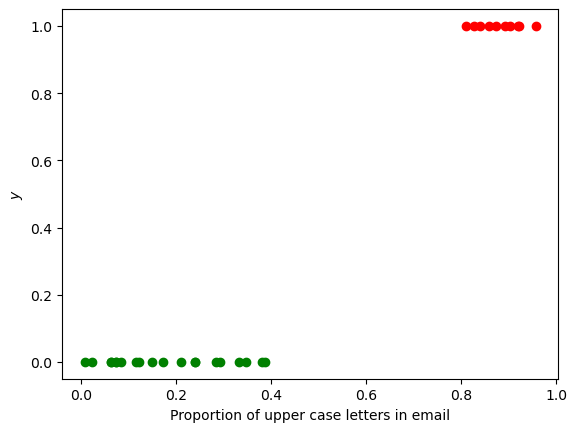

In [2]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)
x_not_spam = 0.4*np.random.uniform(size=20)
y_not_spam = np.zeros(20)
x_spam = 0.8+0.2*np.random.uniform(size=10)
y_spam = np.ones(10)

plt.scatter(x_not_spam, y_not_spam, color='g')
plt.scatter(x_spam, y_spam, color='r')
plt.xlabel("Proportion of upper case letters in email")
plt.ylabel("$y$")
plt.show()

The simplest form of the classification task is univariate binary classification, mapping a single continuous feature to a single binary label.

Suppose you want to identify spam emails.

You collect a lot of emails and manually group them into `not_spam` and `spam`.

Then for each email you calculate the proportion of capitalised words in the email subject.

The graph here shows the relationship between the two, with spam in red and not_spam in green.

Spam emails have a value of 1, meaning the probability of them being spam is 1.

Not_spam emails have a value of 0, meaning the probability of them being spam is 0.

This 0/1 division is key to logistic regression as it lets us assign probabilities to predictions.

The goal of logistic regression is to learn how to predict a value closer to 0 if the input is not spam, and closer to 1 if it is spam.

## Using a linear model

What would happen if we try to model this with a linear model?

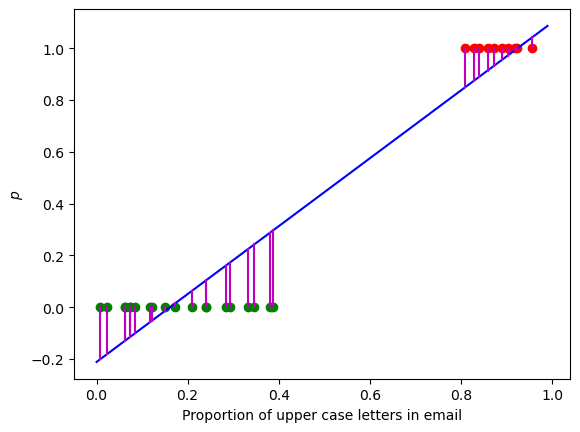

In [3]:
xplot = np.arange(0,1,0.01)
y = np.concatenate([y_spam, y_not_spam])
X = np.concatenate([x_spam, x_not_spam]).reshape([-1,1])

from sklearn.linear_model import LinearRegression

lr = LinearRegression() 
lr.fit(X, y)
w = lr.coef_[0]
b = lr.intercept_

plt.scatter(x_not_spam, y_not_spam, color='g')
plt.scatter(x_spam, y_spam, color='r')
plt.plot(xplot, w*xplot+b, color='b')
for yi, x in zip(y, X.reshape(-1)):
    plt.plot([x,x],[yi, w*x+b], color='m')
plt.xlabel("Proportion of upper case letters in email")
plt.ylabel("$p$")
plt.show()



* Error changes based on distance from line
* Want error to be consistent within each class
    * predictions as close to 0 or to 1 as possible

* Can obtain predictions < 0 and > 1
    * These predictions do not make sense!

The feature we selected allows us to very clearly separate emails into the right class.

However, when we measure the model's error for each data point (red lines: the distance between the actual value (0 or 1) and the predicted value (anything from -0.4 to +1.2) we find that the errors are very variable within each class.

Ideally, we would want a similar error value for all model predictions - as close to 0 as possible for not spam, as close to 1 as possible for spam.

This can be achieved by changing the shape of the line.

## Transformation function

The transformation function $\sigma$ used in the model is known as the *logistic* function. As such, the model is known as *logistic regression*. 

For the binary case, the logistic function simplifies to the *sigmoid*:

$$\sigma(z) = \frac{1}{1 + e^{-z}}$$

The sigmoid function has the properties we want. The line is flat around 0 and 1 and rises sharply between the two.

The key part of logistic regression is learning how to adjust this curve to best fit the data, according to some criteria.

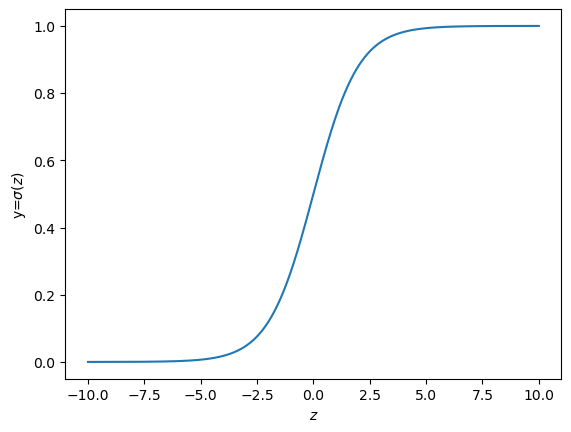

In [4]:
z_sig = np.linspace(-10,10,1000)

def sigmoid(z):
    return 1/(1+np.exp(-z))

plt.plot(z_sig, sigmoid(z_sig))
plt.xlabel('$z$')
plt.ylabel('y=$\sigma(z)$')
plt.show()

## Logistic regression: form

* Univariate logistic regression: $p = \sigma(wx + b)$
* $x$ and $y$ are *variables* of our data
* $w$ and $b$ are *parameters* of the model

The logistic model is basically a linear model, wrapped in the sigmoid function to transform the shape from a straight line to an s-shaped curve.

In our simple model here, a single feature/variable is use to predict a number between 0 and 1.

Where do $w$ and $b$ come from and how do they affect the shape of the model's curve?

## Logistic regression: parameters

* $w$ and $b$: best values learned during training
    * Best values: best reflect the training data
* $w$ affects the steepness of the curve
* *Ratio* of $w$ and $b$ where curve occurs
    * $\sigma(wx+b)=0.5$ when $wx+b=0$

The logistic model learns the best values for $w$ and $b$ from training data. 

For now, we will set them manually to see how they impact the model.

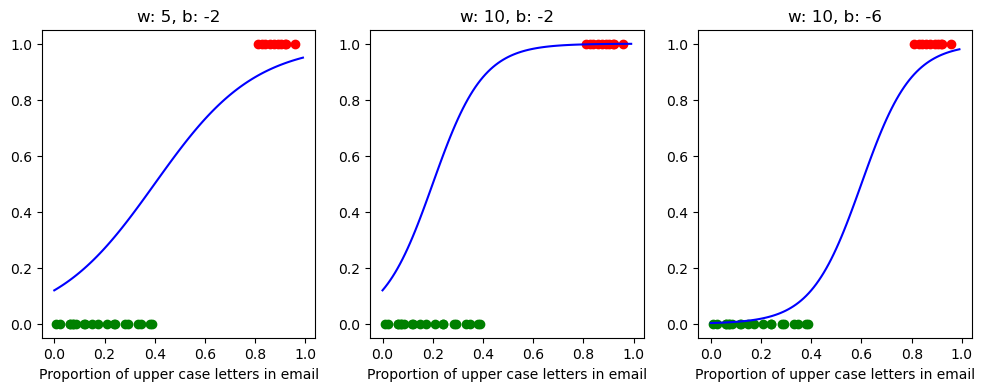

In [5]:
fig, axs = plt.subplots(1,3, figsize=(12,4))
w = [5,10,10]
b = [-2,-2,-6]

for i, ax in enumerate(axs):
    ax.scatter(x_not_spam, y_not_spam, color='g')
    ax.scatter(x_spam, y_spam, color='r')
    ax.plot(xplot, sigmoid(w[i]*xplot+b[i]), color='b')
    ax.set_xlabel("Proportion of upper case letters in email")
    ax.set_title(f'w: {w[i]}, b: {b[i]}')
    

plt.show()

Here we have manually set $w$ and $b$ three times, to create three different logistic models.

## Logistic regression: prediction

* Model outputs a real number between 0 and 1
    * Equivalent to a probablity score

For the model to predict a value, we:

1. input x
2. multiply by weight $w$
3. add the bias $b$
4. apply the sigmoid function

This produces a value between 0 and 1.


## Logistic regression: prediction

Let's take the right model and generate a prediction for a proportion of 0.55:

predicted probability is 0.378


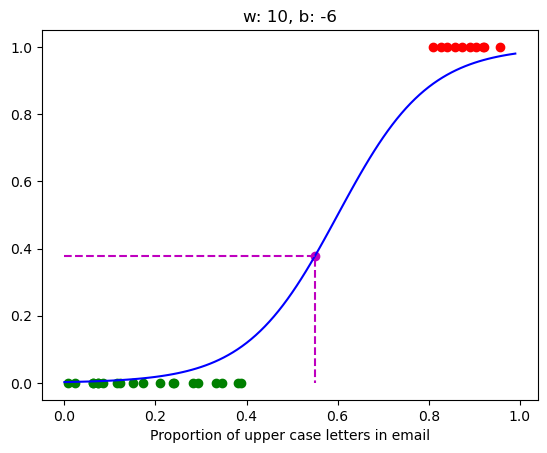

In [6]:
w = 10
b = -6

x = 0.55
y = sigmoid(w*x+b)


plt.scatter(x_not_spam, y_not_spam, color='g')
plt.scatter(x_spam, y_spam, color='r')
plt.plot(xplot, sigmoid(w*xplot+b), color='b')
plt.scatter([x], [y], color='m')
plt.plot([0,x,x], [y,y,0], color='m', linestyle='--')
plt.xlabel("Proportion of upper case letters in email")
plt.title(f'w: {w}, b: {b}')

print(f'predicted probability is {y:.3f}')

For example, if the proportion of uppercase letters in an email's subject line is 0.55, then this model predicts that it is spam with a probability of 0.378.

## Generating discrete predictions

Whilst the probabilities give us lots of useful information, we often need discrete predictions. 

Typically, we assign predictions to the most likely class.

For a binary problem, this is equivalent to comparing the predicted probability to a threshold of 0.5:

$$

\hat{y} = 
\begin{cases}
1 & p\geq0.5 \\
0 & p<0.5
\end{cases}
$$

## Logistic regression: evaluation

* Evaluate using classification metrics
* Simplest is accuracy: $\frac{\vert correct \vert}{\vert data \vert}$
* [0, 0, 0, 1, 1, 1, 1, 1] = truth
* [0, 1, 0, 1, 0, 0, 1, 1] = predicted
* accuracy = 5/8 = 62.5%

Assume you have found the best model parameters. How can you assess the performance of that model on some data?

Classification metrics involve comparing the predicted classes to the expected ones. The simplest is accuracy.

## Discrete predictions: A warning

* Probabilities give us much more information than discrete predictions:
    * How confident is the model that this observation belongs to each class?

* They allow us to make more informed decisions
    * e.g. expected returns, risk, etc.

* We are often better off using the probability values as predictions, and using *probabilistic metrics*, but more on this another time!

## Parallels with linear regression

Like linear regression, logistic regression was first proposed as a *statistical model* for formal hypothesis testing.

As such, there are lot's of concepts shared between the two:

* Coefficient of determination: [Pseudo-R-squared](https://en.wikipedia.org/wiki/Pseudo-R-squared)
* Statistical tests, including [Wald tests](https://en.wikipedia.org/wiki/Wald_test) and [likelihood ratio tests](https://en.wikipedia.org/wiki/Likelihood-ratio_test)
* Assumptions on the data and relationships between $x$ and $y$

However, in this course we will only focus on using logistic regression for supervised learning (i.e. *forecasting*). 

## Logistic regression: sklearn

`sklearn.linear_model.LogisticRegression`

* Implements logistic regression
* Takes care of learning parameters $\beta$ with `.fit()` method
* $X$ can contain as many features as you like
* Easy to get model predictions and their probabilities

From here on, we will look at using logistic regression in Python.

## Logistic regression: sklearn

In [7]:
import seaborn as sns
import pandas as pd

data = pd.read_csv('data/data.csv')
data.head(2)

,species,width
0,0,1.4
1,0,1.4


Let's load some data: measurements of the widths of two species of animal. The task is to see if we can predict the species using only the width as a feature.

## Logistic regression: sklearn

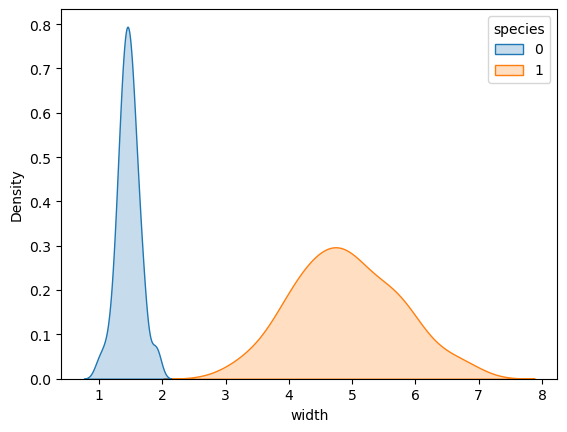

In [ ]:

sns.kdeplot(data=data, x='width', hue='species', fill=True);

Logistic regression works best as a classifier when you are trying to model classes which are actually distinct. One way to check for this is to visualise the distribution of each variable, relative to each class.

Here we have some measurements of the widths of two species of animal. The kernel density plot is like a histogram, showing the distribution of the values of `width` for species `0` and `1`. Here, we see there is very little overlap, so this should be an easy task!

## Logistic regression: sklearn

In [9]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

x = data['width'].values
x = x.reshape(-1, 1)
y = data['species'].values

model.fit(x, y);

In [ ]:

print(f"Weight for single feature x: {model.coef_}\n")
print(f"Bias term for model: {model.intercept_}\n")
print(f"Accuracy score for model: {model.score(x, y)}\n")

Weight for single feature x: [[2.9192494]]

Bias term for model: [-7.92206883]

Accuracy score for model: 1.0



We can instantiate a logistic regression model with one line, then fit the data to it.

This will automatically find the best model parameters - the weight for x and the bias.

Note: Because we only have a single feature, we need to reshape the array for sklearn. This turns it from [1,2,3,4] into [[1],[2],[3],[4]]

Once the model has been trained, we can view the parameters it learned from the data.

Note: sklearn refers to weight/bias as coef_/intercept_ - coef_ is just short for coefficient and is the terminology from linear algebra.

We can also get the accuracy score of the model, by using the `.score()` method and passing back in the original data.

The model achieves perfect accuracy, which probably isn't surprising given how the data looked when we examined it in the kdeplot! And we are also scoring it based on data it has already seen.

## Logistic regression: sklearn

In [11]:
unseen_x = [[0.7], [0.9], [7.2], [50]]

model.predict(unseen_x)

array([0, 0, 1, 1], dtype=int64)

Once a model has been trained using `.fit()`, we can get species predictions for new values of x using the `.predict()` method.

Here, the model has been given some input it was never trained on (it was only trained on values of x between 1 and 6.9).

As you might expect, small values are classified as species 0, large values as species 1.

## Logistic regression: sklearn

In [12]:
for p0, p1 in model.predict_proba(unseen_x):
    print(f"p(0) = {p0:.8f} \tp(1) = {p1:.8f}")

p(0) = 0.99720909 	p(1) = 0.00279091
p(0) = 0.99500716 	p(1) = 0.00499284
p(0) = 0.00000205 	p(1) = 0.99999795
p(0) = 0.00000000 	p(1) = 1.00000000


To get the probabilities, we can use the `.predict_proba()` method. This returns an array with the probability of each class.

These probabilities can be interpreted as how confident the model is in its classification. The closer the score is to 1, the more confident the model is that the data should be assigned to class 1.

## Logistic regression: sklearn

In [13]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

for x in [0.7, 0.9, 7.2, 50]:
    print(f"x={x}\t p(1) = {sigmoid((x * 2.9192494) + -7.92206883):.8f}")

x=0.7	 p(1) = 0.00279091
x=0.9	 p(1) = 0.00499284
x=7.2	 p(1) = 0.99999795
x=50	 p(1) = 1.00000000


You can see that each probability is just the x value, multiplied by ~2.9 and then ~-7.9 added on, then the sigmoid function applied.

To calculate the probability of class 0, simply subtract the probability of class 1 from 1.0.

## Binary logistic regression: summary

* Classification model
* With one feature $x$: $p = \sigma(w x + b)$
    * $p$ is predicted probability of $y$ being True/1
* Learn weight $w$ and bias term $b$ from data
* Model predictions come with probabilities

In this learning unit we looked at the basics of the binary logistic regression model, which uses an s-shaped curve to assign input data to one of two classes. We specifically considered the univariate case of logistic classification, where a single input feature is used to predict a single output variable.

We looked at how logistic regression works in sklearn and how easy it is to train a model, evaluate it, get predictions and their associated probabilities.